In [1]:
import csv, datetime, pandas as pd

# Read data for January 7

In [2]:
file = 'C:\\Users\\vaibhav\\Documents\\UVA\\Summer\\Project\\Code\\Vaibhav\\HoneypotCSV\\2018-01-07-mhn.csv'

parse_dates = ['timestamp']
data = pd.read_csv(file, parse_dates = parse_dates, date_parser = lambda x: datetime.datetime.fromtimestamp(float(x)))
pd.to_datetime(data['timestamp'])
print(data.shape)

(3509, 12)


Finding out unique sources

In [8]:
unique_src = data.src.unique()
print(len(unique_src))

1000


Unique ip sources frequency table

In [9]:
df = data.groupby('src').size().reset_index(name='Count').rename(columns={'src':'Unique src'}).sort_values('Count', ascending = False)
print(df.head())

          Unique src  Count
467    185.107.94.10    571
983     93.115.26.45    326
159  121.231.140.225    314
686  221.229.204.101     86
316     164.52.7.173     84


In [10]:
df = data.groupby('app').size().reset_index(name='Count').rename(columns={'app':'Unique app'}).sort_values('Count', ascending = False)
print(df)

  Unique app  Count
1    dionaea   3181
0       amun    328


Grouping by timestamp

In [13]:
df = data.groupby('timestamp').size().reset_index(name='Count')
print(df.head())

            timestamp  Count
0 2018-01-06 06:51:07      1
1 2018-01-06 06:52:27      1
2 2018-01-06 06:52:47      1
3 2018-01-06 06:53:17      2
4 2018-01-06 06:53:57      1


In [3]:
time_series = data.groupby(data.timestamp.dt.hour).size().reset_index(name='Count').rename(columns={'timestamp':'Hour'})
print(time_series)

    Hour  Count
0      0     77
1      1     86
2      2     79
3      3    117
4      4     79
5      5     78
6      6     86
7      7     75
8      8    183
9      9    251
10    10    198
11    11    229
12    12    152
13    13    177
14    14    509
15    15    116
16    16    124
17    17    152
18    18    150
19    19    159
20    20    143
21    21     78
22    22     97
23    23    114


## Bar chart of time stamp count

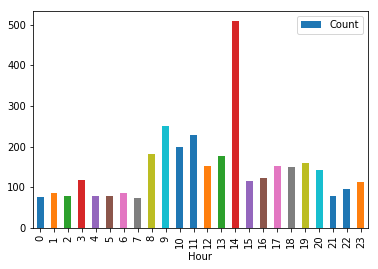

In [5]:
time_series.plot(kind='bar', x = 'Hour', y = 'Count')